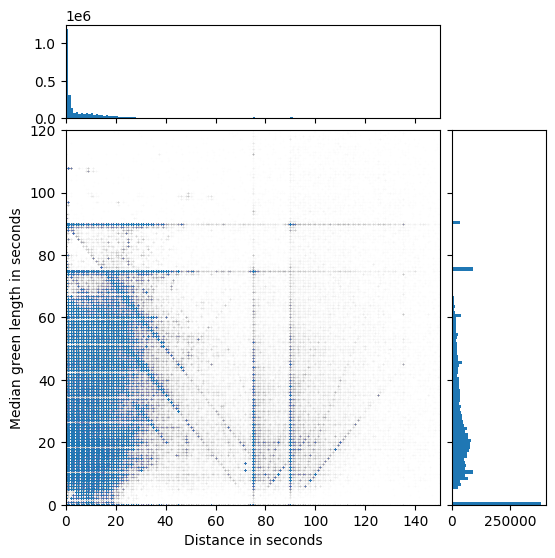

In [6]:
import json
import matplotlib.pyplot as plt
import numpy as np

with open('processed_things_2023_11_21_2.json') as f:
    processed_things = json.load(f)
    
green_lengths = []
distances = []

def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y, s=1, alpha=0.003)
    ax.set_xlabel("Distance in seconds")
    ax.set_ylabel("Median green length in seconds")
    ax.set_ylim(0, 120)
    ax.set_xlim(0, 150)

    # now determine nice limits by hand:
    binwidth = 1
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

for thing_name, thing in processed_things.items():
    for day_idx in range(7):
        for hour_idx in range(24):
            if thing["Metrics"][day_idx][hour_idx] != -1.0 and thing["MedianGreenLengths"][day_idx][hour_idx] != -1.0:
                green_lengths.append(thing["MedianGreenLengths"][day_idx][hour_idx])
                distances.append(thing["Metrics"][day_idx][hour_idx])
                
fig = plt.figure(figsize=(6, 6))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
# Draw the scatter plot and marginals.
scatter_hist(distances, green_lengths, ax, ax_histx, ax_histy)
